In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import params as my

In [2]:
data = pd.read_csv('data.csv')

In [3]:
vtx = data['# vtx with two tracks of opposite curvature'].to_numpy()
x = data['XV (cm)'].to_numpy()
y = data['YV(cm)'].to_numpy()
z = data['ZV(cm)'].to_numpy()
px1 = data['Track1 PX(MeV) '].to_numpy()
py1 = data['Track1 PY(MeV) '].to_numpy()
pz1 = data['Track1 PZ(MeV) '].to_numpy()
px2 = data['Track2 PX(MeV) '].to_numpy()
py2 = data['Track2 PY(MeV) '].to_numpy()
pz2 = data['Track2 PZ(MeV) '].to_numpy()

In [4]:
N_phi = my.luminosity * my.sigma_ee_phi
N_KL = N_phi * my.BR_phi_KK
print(f"Number of produced KL = {int(N_KL)}")

N_KL_measured = N_KL * my.BR_KL_2pi * my.acceptance * my.epsL
print(f"Expected detected KL = {int(N_KL_measured)}")

Number of produced KL = 204000
Expected detected KL = 51


In [5]:
# Define some useful quantities
radius = np.sqrt(x*x + y*y + z*z)

mass_array = np.repeat(my.m_pi, len(data))
E1 = my.getE(mass_array, px1, py1, pz1)
E2 = my.getE(mass_array, px2, py2, pz2)
inv_mass = my.invmass(E1+E2, px1+px2, py1+py2, pz1+pz2)

p_array = np.repeat(my.p_K0, len(data))
p_tot = my.norm(px1+px2, py1+py2, pz1+pz2)

mass_K_array = np.repeat(my.m_K0, len(data))
pKx, pKy, pKz = my.getComponents(p_array, x, y, z)
E_K = my.getE(mass_K_array, pKx, pKy, pKz)

delta_px = pKx - px1 - px2
delta_py = pKy - py1 - py2
delta_pz = pKz - pz1 - pz2

missing_p = my.norm(pKx-px1-px2, pKy-py1-py2, pKz-pz1-pz2)
M2 = (E_K - E1 -E2)**2 - missing_p**2

In [6]:
# Define cuts

cut_r = radius > 4
cut_r_inv = np.invert(cut_r)
cut_FV = (z > -my.zlim) & (z < my.zlim) & (np.sqrt(x*x+y*y) > my.xmin) & (np.sqrt(x*x+y*y) < my.xmax)
cut_m = (inv_mass > my.m_K0 - 8) & (inv_mass < my.m_K0 + 8)
cut_p = (p_tot > my.p_K0 - 20) & (p_tot < my.p_K0 + 20)
cut_M2 = (M2 > -50) & (M2 < 50)

cut_pxpypz = (delta_px > -100) & (delta_px < 100) & (delta_py > -100) & (delta_py < 100) & (delta_pz > -100) & (delta_pz < 100)

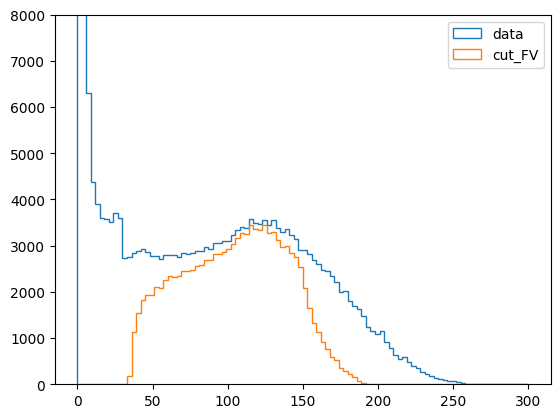

In [9]:
nbins = 100
lims = (0, 300)

plt.hist(radius, histtype = 'step', bins = nbins, range = lims, label = 'data')
plt.hist(radius[cut_FV], histtype = 'step', bins = nbins, range = lims, label = 'cut_FV')


#plt.vlines(np.sqrt(my.xmin**2 + my.ymin**2), 0, 20000, 'r', linestyle = '--', label = 'FV minimum radius', alpha = 0.5)
plt.ylim(0, 8000)

plt.legend();

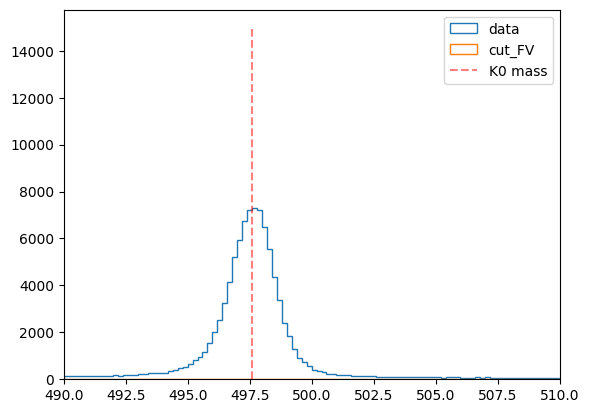

In [26]:
lims = (490, 510)

plt.hist(inv_mass, histtype = 'step', bins = nbins, range = lims, label = 'data')
plt.hist(inv_mass[cut_FV], histtype = 'step', bins = nbins, range = lims, label = 'cut_FV')

plt.vlines(my.m_K0, 0, 15000, 'r', linestyle = 'dashed', label = 'K0 mass', alpha = 0.5)
plt.xlim(lims)
plt.legend();

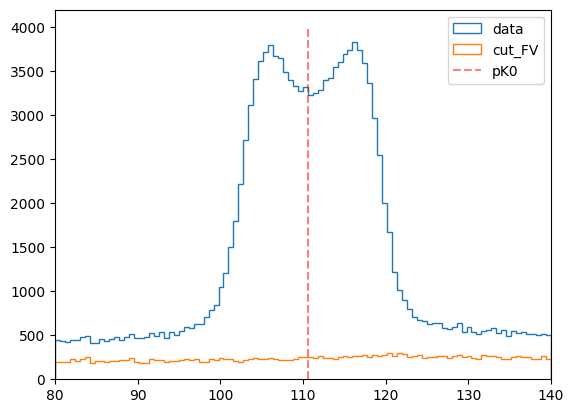

In [21]:
bins = 100
lims = (80,140)

plt.hist(p_tot, histtype = 'step', bins = bins, range = lims, label = 'data')
plt.hist(p_tot[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')

plt.vlines(my.p_K0, 0, 4000, 'r', linestyle = 'dashed', label = 'pK0', alpha = 0.5)
plt.xlim(lims)
plt.legend();

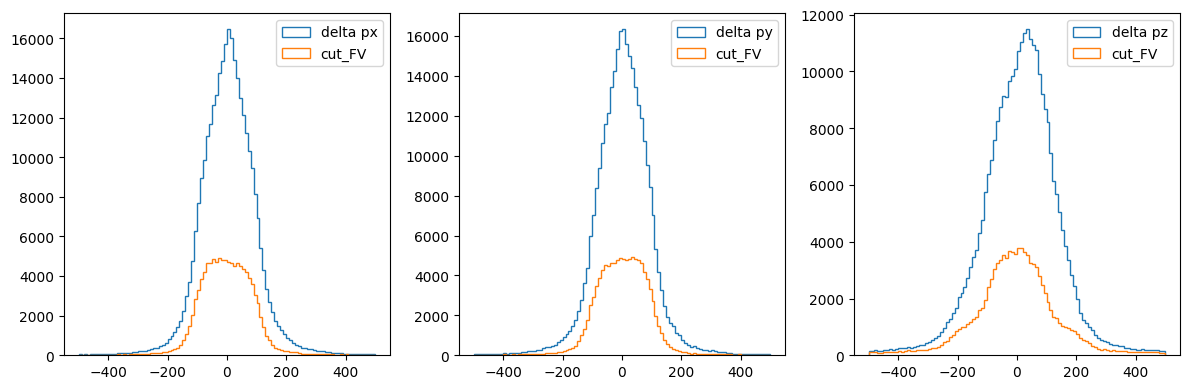

In [22]:
plt.figure(figsize = (12,4))

bins = 100
lims = (-500,500)

plt.subplot(131)


plt.hist(delta_px, histtype = 'step', bins = bins, range = lims,label = 'delta px')
plt.hist(delta_px[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(132)


plt.hist(delta_py, histtype = 'step', bins = bins, range = lims,label = 'delta py')
plt.hist(delta_py[cut_FV], histtype = 'step', bins = bins, range = lims,label = 'cut_FV')
plt.legend()

plt.subplot(133)

plt.hist(delta_pz, histtype = 'step', bins = bins, range = lims, label = 'delta pz')
plt.hist(delta_pz[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
plt.legend()

plt.tight_layout();

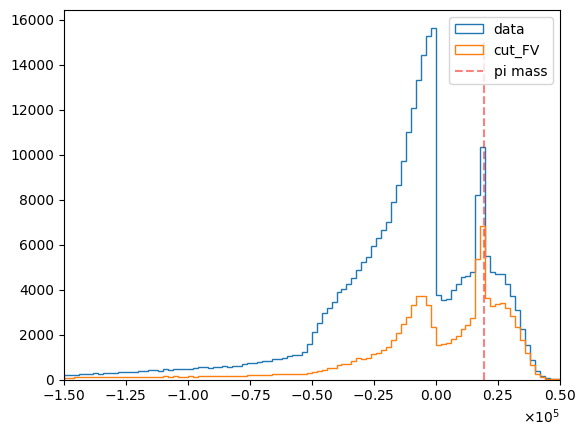

In [23]:
lims = (-150000,50000)

plt.ticklabel_format(axis='x', style='sci', scilimits=(0,3), useMathText = True)
plt.hist(M2, histtype = 'step', bins = bins, range = lims, label = 'data');
plt.hist(M2[cut_FV], histtype = 'step', bins = bins, range = lims, label = 'cut_FV')
plt.vlines(my.m_pi**2, 0, 15000, 'r', linestyle = 'dashed', label = 'pi mass', alpha = 0.5)
plt.legend()
plt.xlim(lims);

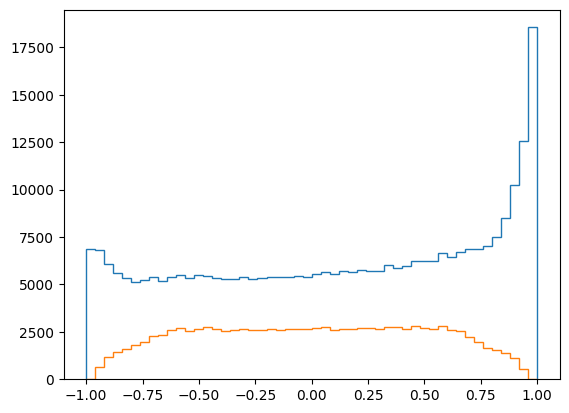

In [47]:
theta = my.getTheta(x,y,z)

bins = 50

n, bins, _ = plt.hist(np.cos(theta), histtype = 'step', bins = bins);
plt.hist(np.cos(theta[cut_FV]), histtype = 'step', bins = bins);

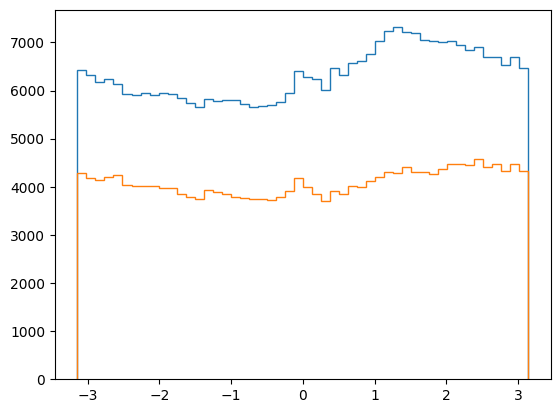

In [45]:
phi = my.getPhi(x,y,z)

bins = 50

plt.hist(phi, histtype = 'step', bins = bins);
plt.hist(phi[cut_r], histtype = 'step', bins = bins);